# CBOE NASDAQ Market Volatility Index (VXN)

https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/cboe-nasdaq-vxn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
index = '^VXN'
start = '2018-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol, start, end)
vxn = yf.download(index, start, end)

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615887,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608818,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797443,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261929,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108677,82271200


In [3]:
vxn.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-24,35.639999,38.700001,35.360001,38.680000,38.680000,0
2018-12-26,37.599998,38.580002,33.110001,33.700001,33.700001,0
2018-12-27,35.689999,38.549999,34.150002,34.369999,34.369999,0
2018-12-28,34.369999,35.070000,32.689999,34.200001,34.200001,0
2018-12-31,33.830002,33.919998,31.440001,31.440001,31.440001,0


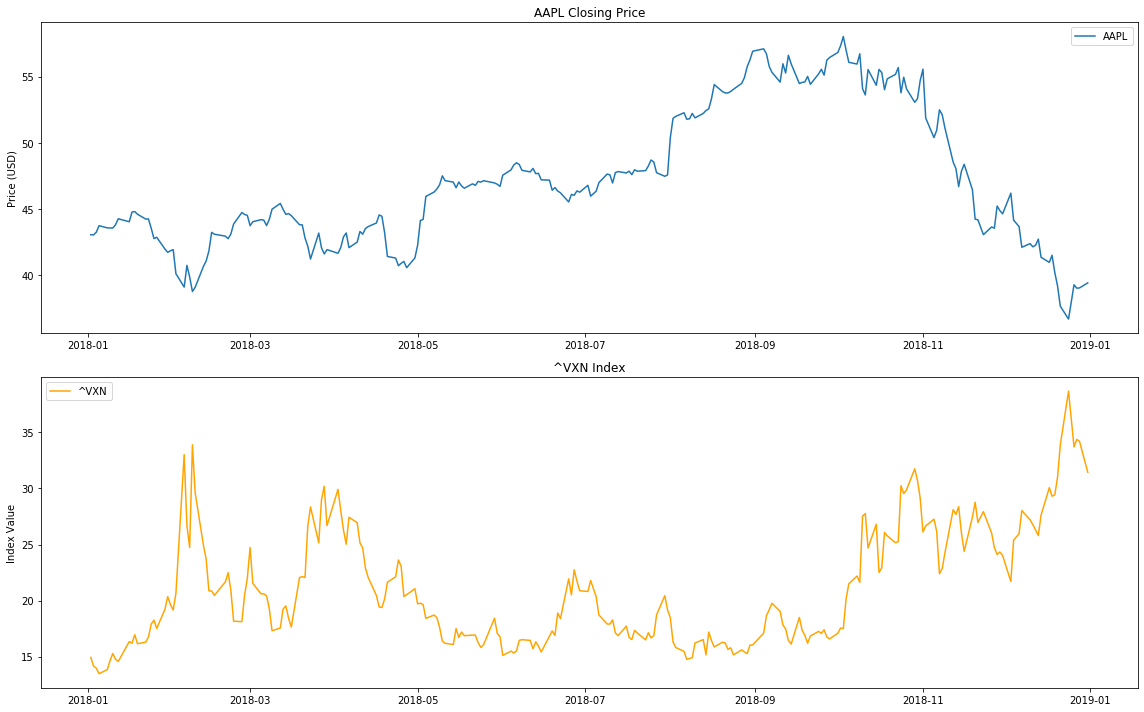

In [4]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(2, 1, 1)

ax1.plot(df['Close'], label=symbol)
ax1.set_title(f'{symbol} Closing Price')
ax1.set_ylabel('Price (USD)')
ax1.legend()

# Plot VXN index on second subplot
ax2 = plt.subplot(2, 1, 2)
ax2.plot(vxn['Close'], label=index, color='orange')
ax2.set_title(f'{index} Index')
ax2.set_ylabel('Index Value')
ax2.legend()

plt.tight_layout()
plt.show()

## Candlestick with CBOE NASDAQ Market Volatility Index (VXN)

In [5]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736696.0,42.540001,43.075001,42.314999,43.064999,40.615887,102223600,False
1,736697.0,43.132500,43.637501,42.990002,43.057499,40.608818,118071600,False
2,736698.0,43.134998,43.367500,43.020000,43.257500,40.797443,89738400,False
3,736699.0,43.360001,43.842499,43.262501,43.750000,41.261929,94640000,False
4,736702.0,43.587502,43.902500,43.482498,43.587502,41.108677,82271200,False


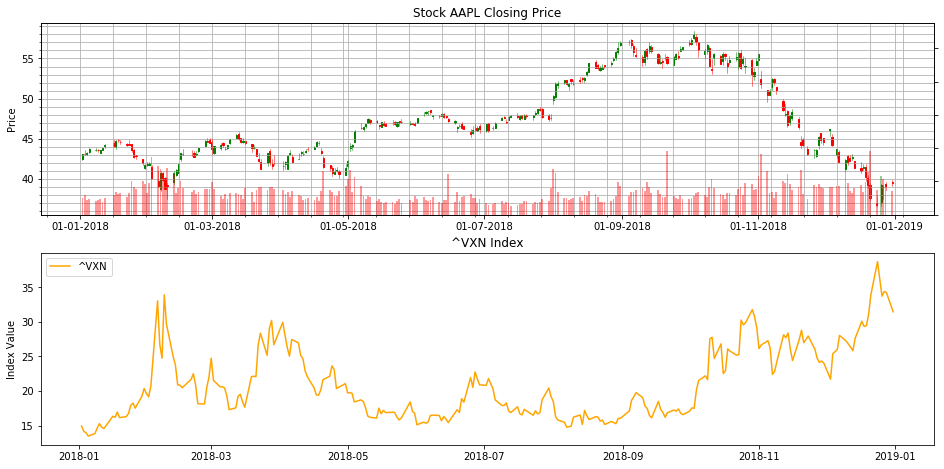

In [6]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot(3, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(vxn['Close'], label=index, color='orange')
ax2.set_title(f'{index} Index')
ax2.set_ylabel('Index Value')
ax2.legend()